<a href="https://colab.research.google.com/github/woojin22/ds-section1-sprint3-new/blob/main/n132%20-%20PCA/n132a%20-%20PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src='https://i.imgur.com/RDAD11M.png' width = '200' align = 'right'>

## *DATA SCIENCE / SECTION 1 / SPRINT 3 / NOTE 2*

# 📝 Assignment



# 🌱 **기본 과제**

## **Part 1. Eigenstuff**

- 벡터 $[2, 1]$이 $T$에 의해 변환된 벡터는 무엇인지 구하세요.
- 벡터 $[-1, 2]$가 $T$에 의해 변환된 벡터는 무엇인지 구하세요.
- numpy를 사용하여 $T$에 대한 eigenvalue와 eigenvector를 구하세요. 
> $T = \begin{bmatrix} 9 & 4 \\ 4 & 3 \end{bmatrix}$

##### **Q1. 벡터 $[2, 1]$이 $T$에 의해 변환된 벡터를 스칼라곱 형태로 나타내었을 때, 스칼라 값과 벡터를 ($1, [2,3]$) 형태로 쓰세요.**

In [46]:
import pandas as pd
import numpy as np

In [47]:
T = np.array([[9,4],[4,3]])
test1 = np.array([2,1])
np.matmul(test1, T)

array([22, 11])

[22, 11] --> 11[2,1]

---


따라서 (11, [2, 1])

##### **Q2. 벡터 $[-1, 2]$가 $T$에 의해 변환된 벡터를 스칼라곱 형태로 나타내었을 때, 스칼라 값과 벡터를 ($1, [2, 3]$) 형태로 쓰세요.**

In [48]:
test2 = np.array([-1,2])
np.matmul(test2, T)

array([-1,  2])

[-1, 2] --> 1[-1, 2]

---

따라서 (1, [-1, 2])

##### **Q3. Numpy를 사용하여 구한 $T$의 eigenvalue에 따른 eigenvector를 ($1, [2, 3]$) 형태로 모두 쓰세요. (단, eigenvector의 각 성분은 반올림하여 소수점 둘째 자리까지 구하세요.)**

In [49]:
eigenstuff = np.linalg.eig(T)
eigenstuff

(array([11.,  1.]), array([[ 0.89442719, -0.4472136 ],
        [ 0.4472136 ,  0.89442719]]))

(11, [0.89, 0.45]) (1, [-0.45, 0.89])

## **Part 2. PCA**

### **2-1. 데이터셋 준비하기**

- 다음 링크를 참조하여 `penguins` 데이터셋을 불러오세요. <br>
  <http://seaborn.pydata.org/generated/seaborn.load_dataset.html#seaborn.load_dataset>
- 5개의 feature `species`, `bill_length_mm`, `bill_depth_mm`, `flipper_length_mm`, `body_mass_g`만 추출하여 데이터프레임 형태로 저장하세요. 
  - 데이터프레임의 이름은 `features`로 합니다. 
- `features` 데이터프레임의 결측치가 있는 row를 출력하여 확인 후 제거하세요. 
  - 결측치 제거 후 데이터프레임의 인덱스를 초기화합니다.
- `species` column은 변수 `species`에 따로 분리하여 저장하세요.
  - `features`에서는 `species` column을 제거합니다. 


In [50]:
import seaborn as sns
df = sns.load_dataset('penguins')
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [51]:
features = df.drop(['island','sex'], axis=1)
features

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,Adelie,39.1,18.7,181.0,3750.0
1,Adelie,39.5,17.4,186.0,3800.0
2,Adelie,40.3,18.0,195.0,3250.0
3,Adelie,NaN,NaN,NaN,NaN
4,Adelie,36.7,19.3,193.0,3450.0
...,...,...,...,...,...
339,Gentoo,NaN,NaN,NaN,NaN
340,Gentoo,46.8,14.3,215.0,4850.0
341,Gentoo,50.4,15.7,222.0,5750.0
342,Gentoo,45.2,14.8,212.0,5200.0


In [52]:
features.isnull().sum()

species              0
bill_length_mm       2
bill_depth_mm        2
flipper_length_mm    2
body_mass_g          2
dtype: int64

In [53]:
features = features.dropna(axis=0)
features = features.reset_index(drop=True)
features

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,Adelie,39.1,18.7,181.0,3750.0
1,Adelie,39.5,17.4,186.0,3800.0
2,Adelie,40.3,18.0,195.0,3250.0
3,Adelie,36.7,19.3,193.0,3450.0
4,Adelie,39.3,20.6,190.0,3650.0
...,...,...,...,...,...
337,Gentoo,47.2,13.7,214.0,4925.0
338,Gentoo,46.8,14.3,215.0,4850.0
339,Gentoo,50.4,15.7,222.0,5750.0
340,Gentoo,45.2,14.8,212.0,5200.0


In [ ]:
species = features['species']
species = species.values.tolist()
species

In [55]:
features = features.drop('species',axis=1)
features

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
3,36.7,19.3,193.0,3450.0
4,39.3,20.6,190.0,3650.0
...,...,...,...,...
337,47.2,13.7,214.0,4925.0
338,46.8,14.3,215.0,4850.0
339,50.4,15.7,222.0,5750.0
340,45.2,14.8,212.0,5200.0


##### **Q4. 결측치가 포함된 row는 모두 몇 개인지 쓰세요.**

In [56]:
# 2개

### **2-2. PCA**

- 먼저 데이터를 표준화 하세요. 
  - sklearn에서 제공하는 `StandardScaler` 라이브러리로 표준화를 수행해보세요.
- 표준화한 데이터에 대하여 PCA를 시행하세요. 
  - PC(주성분)는 2개로 합니다. 
- 두 PC에 대하여 scatter plot을 그리세요. 
  - x축에는 첫 번째 주성분을, y축에는 두 번째 주성분을 기준으로 시각화하세요.
  - seaborn 라이브러리의 `.scatterplot()`에서 `hue` 파라미터를 `species`로 설정해 보세요. 
- 2개의 PC를 이용하여 설명되는 variance의 ratio를 `ratio`에 저장하세요.

In [92]:
import sklearn
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# StandardScaler()를 사용하여 데이터 표준화
scaler = StandardScaler()
Z = scaler.fit_transform(features)

# 표준화한 데이터에 대하여 pca 시행
pca = PCA(n_components=2)
pc = pca.fit_transform(Z)

##### **Q5. scatter plot에서 가장 오른쪽에 위치한 펭귄의 species는 무엇인지 쓰세요.**

<AxesSubplot:>

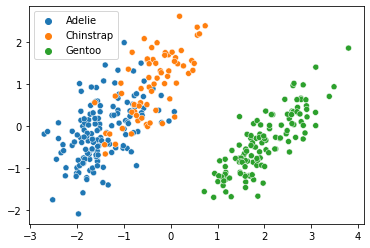

In [93]:
ratio = pca.explained_variance_ratio_

sns.scatterplot(x=pc[:,0], y=pc[:,1], hue=species)

# 정답은 Gentoo

##### **Q6. 2개의 PC를 이용하여 설명되는 variance의 ratio의 합은 몇 %인지 고르세요.**
- 60% 미만
- 60% 이상 70% 미만
- 70% 이상 80% 미만
- 80% 이상 

In [95]:
ratio
# 0.68 + 0.19 = 0.87

array([0.68843878, 0.19312919])

# 🥇 **도전 과제** 

## **Part 3. Scree Plot**
> **Part 2**에서 표준화한 데이터셋을 계속 사용합니다. 

- **PCA의 PC를 4개로 하여 "Scree Plot"을 만들어 보세요.** 
  - 몇 개의 PC를 사용하는 게 가장 적절한지 논리적으로 설명해 보세요. 
  - 90%의 내용을 설명하기 위해서는 몇 개의 PC를 사용해야 하는지 쓰세요.


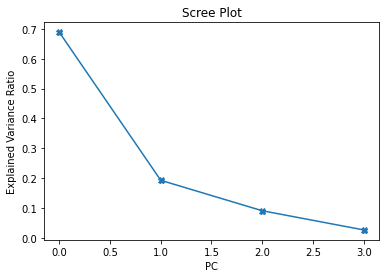

[0.68843878 0.19312919 0.09130898 0.02712305]


In [97]:
pca2 = PCA(n_components=4)
pca2.fit(Z)
features_pca = pca2.transform(Z)

plt.plot(pca2.explained_variance_ratio_, marker='X')
plt.title('Scree Plot')
plt.xlabel('PC')
plt.ylabel('Explained Variance Ratio')
plt.show()
ratio2 = pca2.explained_variance_ratio_
print(ratio2)

주성분의 개수는 Scree Plot으로 시각화 해보았을때 라인이 급격히 완만해지는 구간이 생기는 지점이 적절한 주성분의 개수이다

---

90%의 내용을 설명하기 위해서는 3개의 주성분을 사용해야 한다